# Bank Churn Prediction

**Objective:**
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Context:** 
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Data Description:** 
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

**Data Dictionary:**
- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all?

## Import the necessary packages

In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, auc

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

## Mount Google drive and read the file

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
project_path = '/content/drive/My Drive/Colab Notebooks/'

In [5]:
dataset_file = project_path + 'bank.csv'

In [6]:
df = pd.read_csv(dataset_file)

In [7]:
df.head()

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]



## Dropping unnecessary columns

In [8]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.head(10)

CreditScore Geography  Gender  ...  IsActiveMember  EstimatedSalary  Exited
0          619    France  Female  ...               1        101348.88       1
1          608     Spain  Female  ...               1        112542.58       0
2          502    France  Female  ...               0        113931.57       1
3          699    France  Female  ...               0         93826.63       0
4          850     Spain  Female  ...               1         79084.10       0
5          645     Spain    Male  ...               0        149756.71       1
6          822    France    Male  ...               1         10062.80       0
7          376   Germany  Female  ...               0        119346.88       1
8          501    France    Male  ...               1         74940.50       0
9          684    France    Male  ...               1         71725.73       0

[10 rows x 11 columns]

In [9]:
df.shape #Shape of the dataset

(10000, 11)

In [10]:
df.describe() #dataset description

CreditScore           Age  ...  EstimatedSalary        Exited
count  10000.000000  10000.000000  ...     10000.000000  10000.000000
mean     650.528800     38.921800  ...    100090.239881      0.203700
std       96.653299     10.487806  ...     57510.492818      0.402769
min      350.000000     18.000000  ...        11.580000      0.000000
25%      584.000000     32.000000  ...     51002.110000      0.000000
50%      652.000000     37.000000  ...    100193.915000      0.000000
75%      718.000000     44.000000  ...    149388.247500      0.000000
max      850.000000     92.000000  ...    199992.480000      1.000000

[8 rows x 9 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


## Unique Values

In [14]:
df.nunique() #unique values

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [15]:
df["CreditScore"].value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64

**More than 200 people have credit score of 850.**

In [16]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

**More than 5000 people are located in France. Germany and Spain have 2509 and 2477 respectively**

In [17]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

**The dataset almost divided equally with both male and female.**

In [18]:
df["Age"].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [19]:
df["Tenure"].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [20]:
df["Balance"].value_counts()

0.00         3617
105473.74       2
130170.82       2
113063.83       1
80242.37        1
             ... 
183555.24       1
137648.41       1
112689.95       1
115465.28       1
74681.90        1
Name: Balance, Length: 6382, dtype: int64

**3617 people have zero balance**

In [21]:
df["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [22]:
df["HasCrCard"].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [23]:
df["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [24]:
 df["EstimatedSalary"].value_counts()

24924.92     2
109029.72    1
182025.95    1
82820.85     1
30314.04     1
            ..
158302.59    1
171037.63    1
43036.60     1
55034.02     1
104181.78    1
Name: EstimatedSalary, Length: 9999, dtype: int64

In [25]:
 df["Exited"].value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

## Null Values

In [26]:
df.isnull().sum().sum() #Total Number of missing values in  dataframe

0

## Checking Duplicates

In [27]:
##Identify duplicates records in the data
dupes = df.duplicated()
sum(dupes)

0

## Univariate Analysis

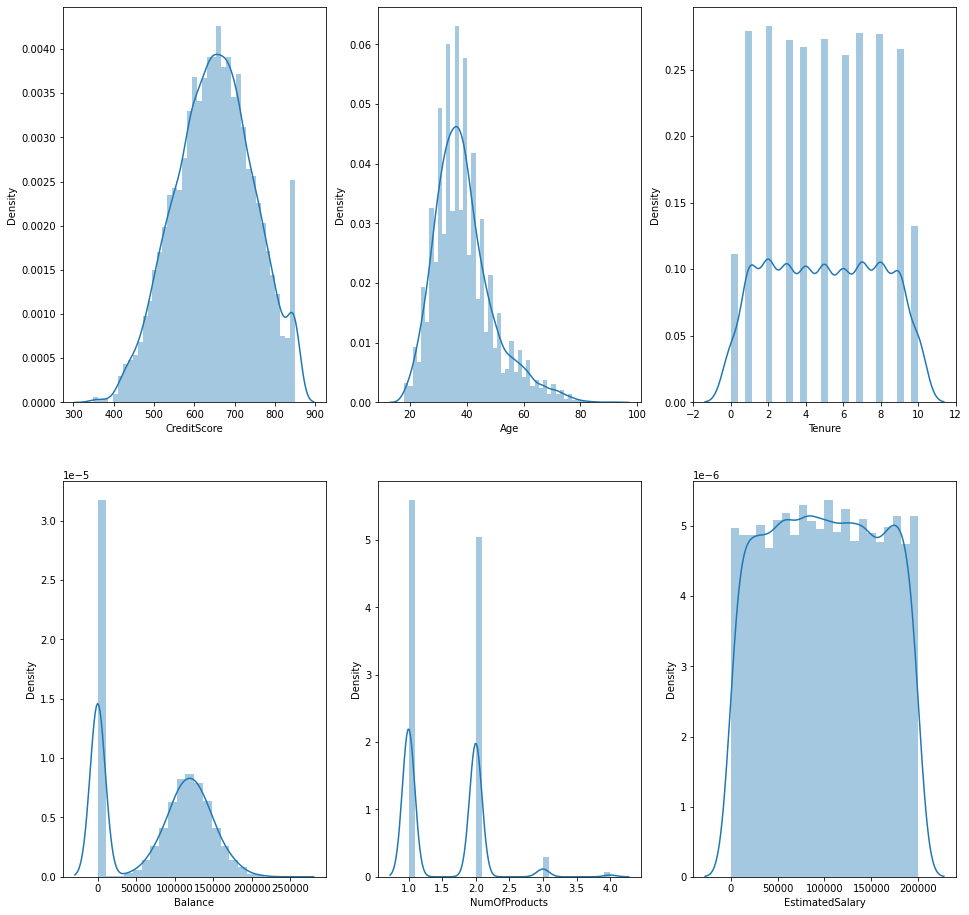

In [28]:
# Distplot

fig, ax2 = plt.subplots(2, 3, figsize=(16, 16))
sns.distplot(df['CreditScore'],ax=ax2[0][0])
sns.distplot(df['Age'],ax=ax2[0][1])
sns.distplot(df['Tenure'],ax=ax2[0][2])
sns.distplot(df['Balance'],ax=ax2[1][0])
sns.distplot(df['NumOfProducts'],ax=ax2[1][1])
sns.distplot(df['EstimatedSalary'],ax=ax2[1][2])

**Credit score and age is distributed almost normal. Balanace has two gaussians.**

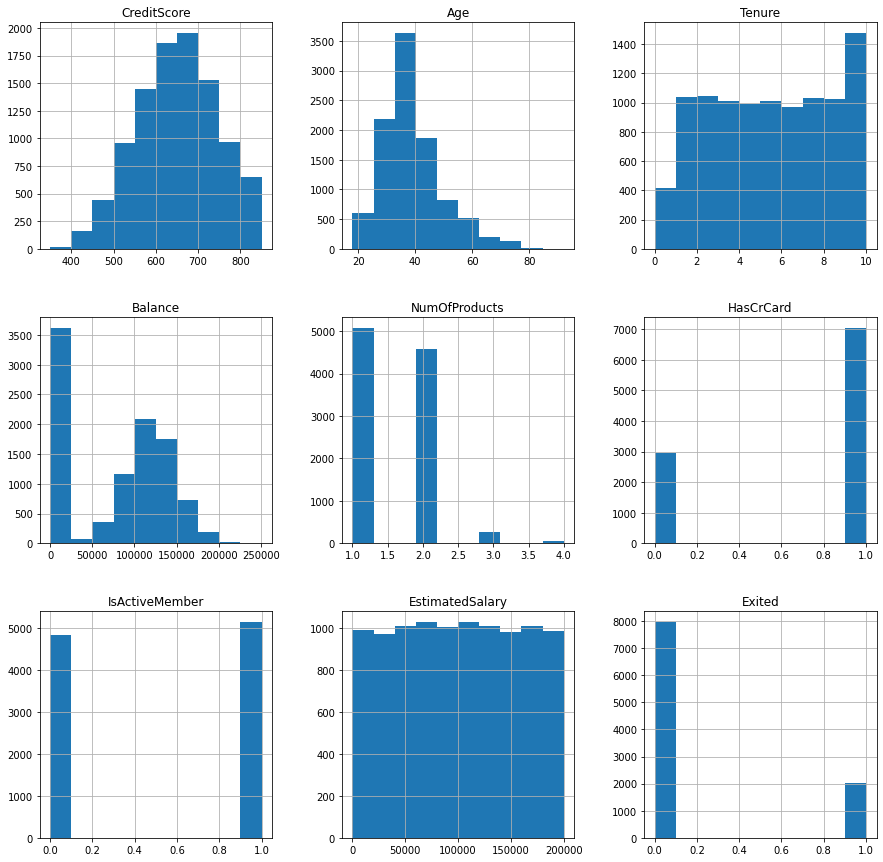

In [29]:
df.hist(figsize=(15,15));

**Observation:**
   - The number of people having credit card is double the number of people who don't have credit cards.
   - Most number of people in this dataset have zero balance.
   - More than 5000 people atleast have one product from the bank.
   - Only half the people in the dataset is active with the bank.
   - approximately 2000 people left the bank.

## Bivariate Analysis

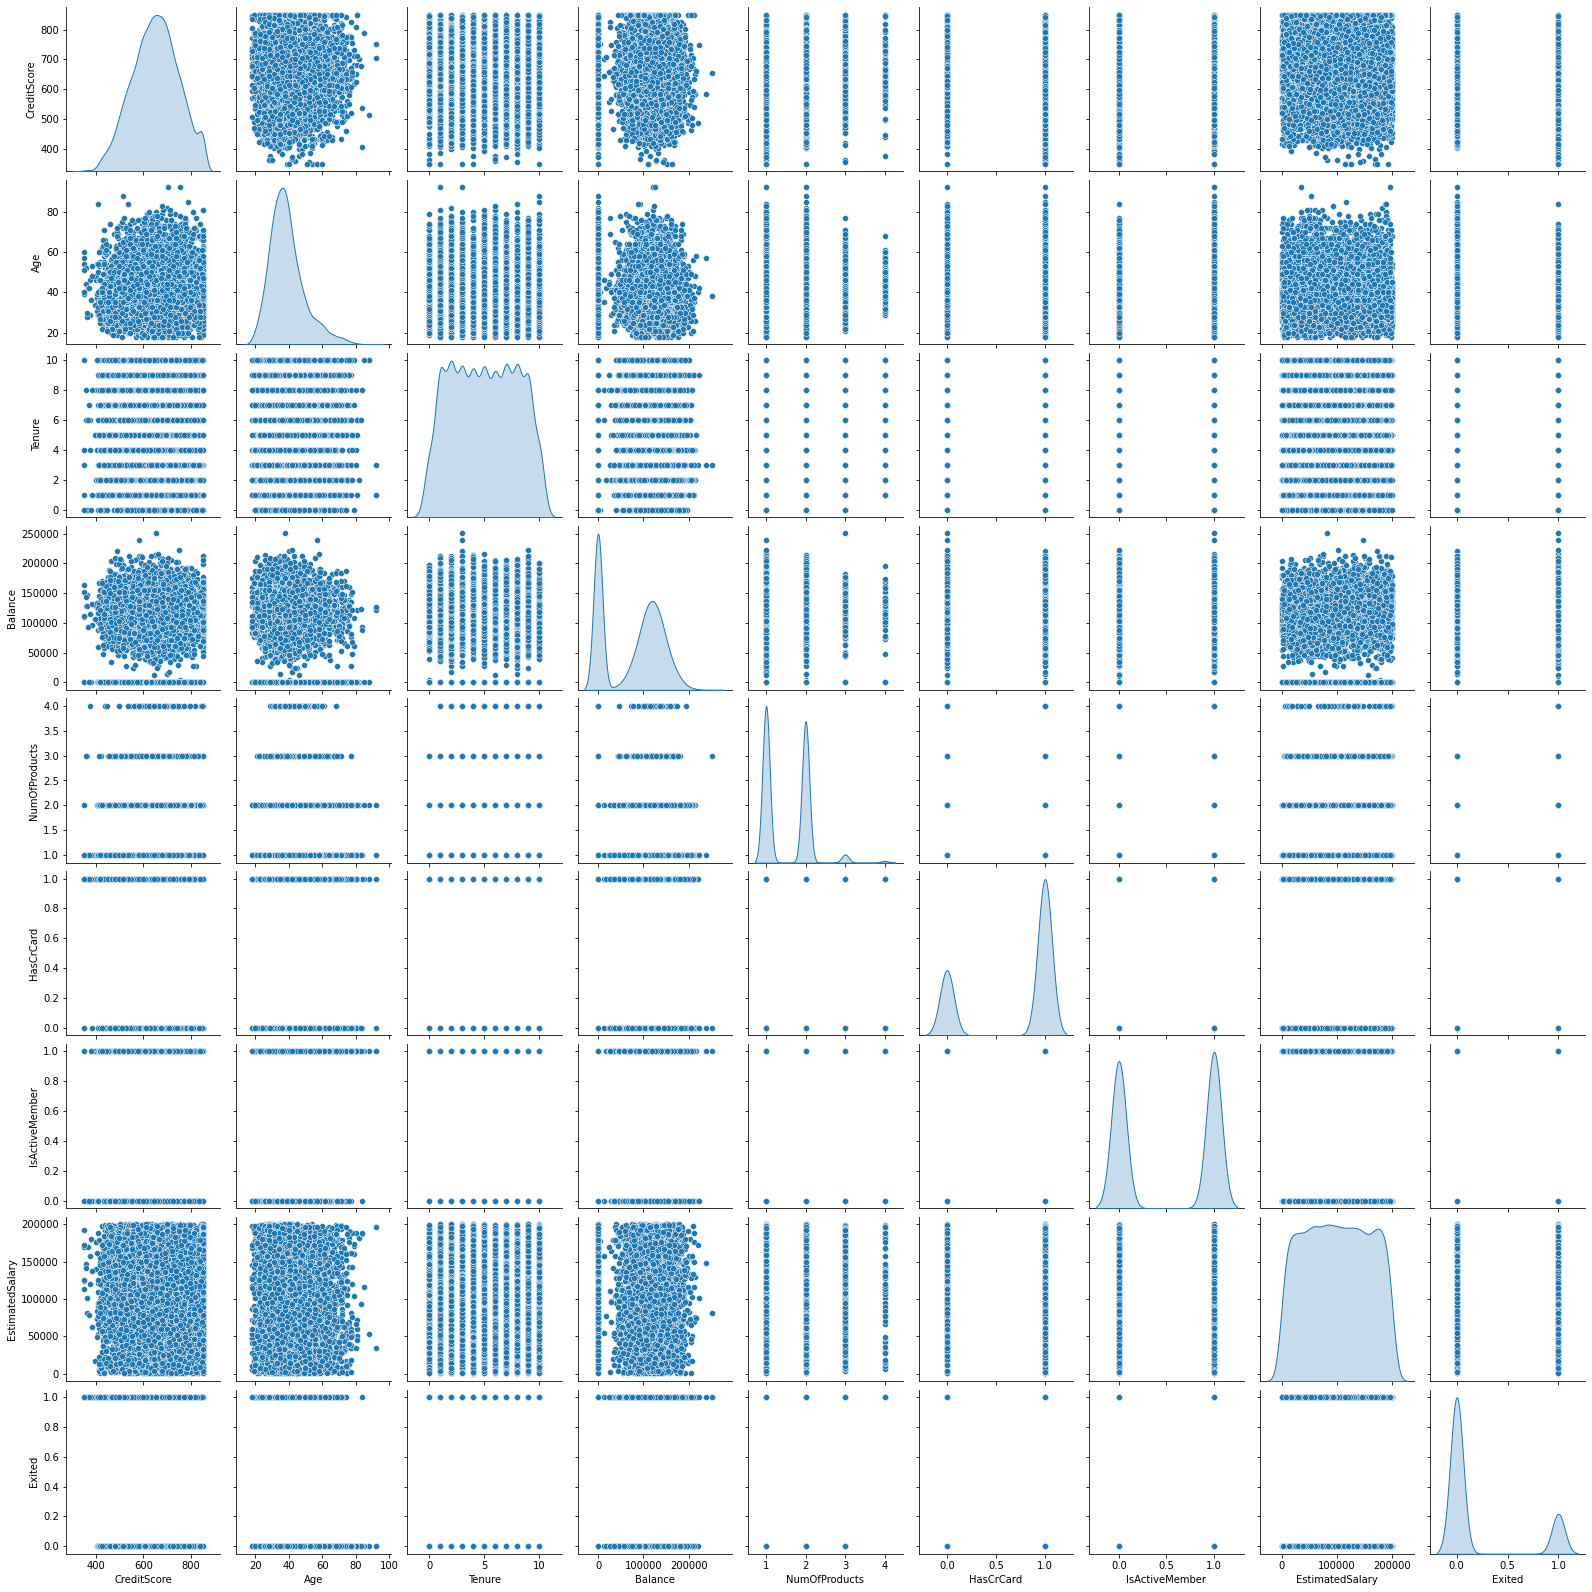

In [30]:
#bivariate

sns.pairplot(df,diag_kind='kde')

- **There is no linear relationship between any of the columns.**
- **Tenure and estimated salary have multiple Guassians.**
- **credit score and age is distribtue normal.**
- **Balance has 2 gaussian and rightly skewed.**
- **Some people eventhough they have good credit score,good account balance and good salary still exit the bank.** 

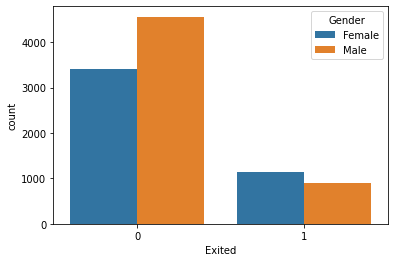

In [71]:
sns.countplot(x='Exited', hue='Gender', data=df) 

**More female exit the bank compare to the the male.**

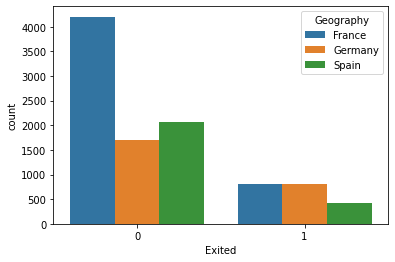

In [72]:
sns.countplot(x='Exited', hue='Geography', data=df) 

**More people from France and Germany exit the bank compare to Spain.**

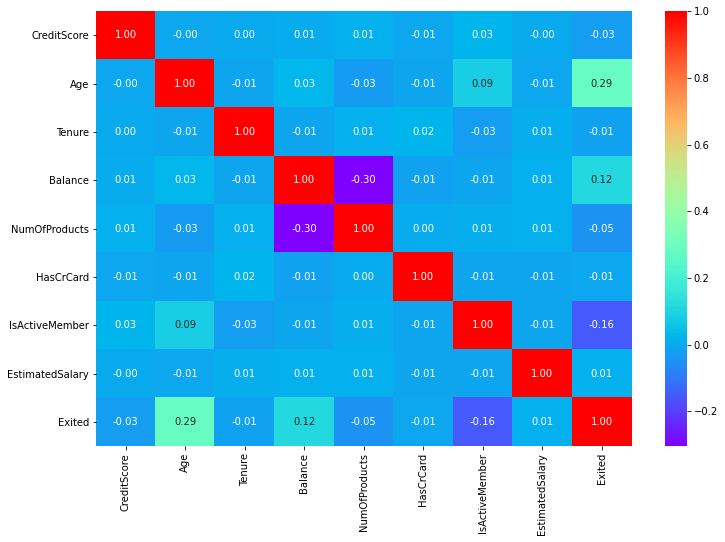

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow', ) #heatmap
plt.show()

In [32]:
df.head()

CreditScore Geography  Gender  ...  IsActiveMember  EstimatedSalary  Exited
0          619    France  Female  ...               1        101348.88       1
1          608     Spain  Female  ...               1        112542.58       0
2          502    France  Female  ...               0        113931.57       1
3          699    France  Female  ...               0         93826.63       0
4          850     Spain  Female  ...               1         79084.10       0

[5 rows x 11 columns]

## Modifying the data

In [33]:
#creating dummy values for geography and gender as they are string values. 
oneHotCols=["Geography","Gender"]
df1=pd.get_dummies(df, columns=oneHotCols)
df1.head()

CreditScore  Age  Tenure  ...  Geography_Spain  Gender_Female  Gender_Male
0          619   42       2  ...                0              1            0
1          608   41       1  ...                1              1            0
2          502   42       8  ...                0              1            0
3          699   39       1  ...                0              1            0
4          850   43       2  ...                1              1            0

[5 rows x 14 columns]

In [34]:
df1.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
dtype: object

## Split the data for training and testing

In [35]:
#specify the data
X = df1.drop("Exited" , axis=1)

#specify the target labels
Y =df1['Exited']

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Scale[normalize] the data

In [36]:


# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [37]:
#check the shape of each data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 13)
(3000, 13)
(7000,)
(3000,)


## Model

In [48]:
#Creating a model

model = Sequential()


## Deep Neural Network

In [49]:
#Adding layers

#After multiple training this looks like best parameter
model.add(Dense(300, input_shape = (13,), activation = 'relu'))  #1st layer
model.add(Dense(150, activation = 'relu'))                       #1st hidden layer
model.add(Dense(20, activation = 'relu'))                       #2nd Hidden layer                   

model.add(Dense(1, activation = 'sigmoid')) #softmax funtion for classification.

In [50]:
#using adam optimizer
sgd = optimizers.Adam(lr = 0.0001) 

In [51]:
#specifying the loss function, optimer and metrics to the model
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy']) 

In [52]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 300)               4200      
_________________________________________________________________
dense_5 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_6 (Dense)              (None, 20)                3020      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 52,391
Trainable params: 52,391
Non-trainable params: 0
_________________________________________________________________


### Training [ Forward Pass and Back Propagation]

In [55]:
#training
model.fit(X_train, y_train.values, batch_size = 10, epochs = 10, verbose = 1)

Epoch 1/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3255 - accuracy: 0.8660
Epoch 2/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3223 - accuracy: 0.8650
Epoch 3/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3215 - accuracy: 0.8654
Epoch 4/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3186 - accuracy: 0.8687
Epoch 5/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3173 - accuracy: 0.8686
Epoch 6/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3149 - accuracy: 0.8699
Epoch 7/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3144 - accuracy: 0.8691
Epoch 8/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3129 - accuracy: 0.8691
Epoch 9/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3099 - accuracy: 0.8699
Epoch 10/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3091 - accuracy: 0.8694

**Training Accuracy 0.8694 and loss of 0.3091**

### Testing

In [57]:
results = model.evaluate(X_test, y_test.values)


94/94 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8670


## Model Evaluation

**Test accuracy of 0.8670 and loss 0.3350**

In [61]:
#test accuracy
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[0.33503448963165283, 0.8669999837875366]


## Accuracy and Confusion Matrix

In [62]:
#Predict the results using 0.5 as a threshold

y_pred = (model.predict_proba(X_test) >= 0.5).astype(bool)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,y_pred)))
print('Precision_score: ' + str(precision_score(y_test.values, y_pred)))
print('F-score: ' + str(f1_score(y_test.values,y_pred)))
confusion_matrix(y_test.values, y_pred)

94/94 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8670
Accuracy Model1 (Dropout): 0.8669999837875366
Recall_score: 0.4657534246575342
Precision_score: 0.7576601671309192
F-score: 0.576882290562036


array([[2329,   87],
       [ 312,  272]])

In [63]:
Y_pred_cls = model.predict_classes(X_test, batch_size=100, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

94/94 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8670
Accuracy Model1 (Dropout): 0.8669999837875366
Recall_score: 0.4657534246575342
Precision_score: 0.7576601671309192
F-score: 0.576882290562036


array([[2329,   87],
       [ 312,  272]])